# Recurrent Neural Networks

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data. 

Recurrent neural networks (RNN) are a class of neural networks that are helpful in modeling sequence data. Derived from feedforward networks, RNNs exhibit similar behavior to how human brains function. Simply put: recurrent neural networks produce predictive results in sequential data that other algorithms can’t.

Feed-forward neural network:
1.Cannot handle sequential data
2.Considers only the current input
3.Cannot memorize previous inputs

An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory.

# 1. Import necessary Libraries 

In [2]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import initializers

Using TensorFlow backend.


In [3]:
import pandas as pd

# 2. Import Training Set

In this notebook I am trying to find out how LSTMs work ,to predict the prices of stocks using the “Google stock price” data.Based on the stock price data between 2012 and 2016, we will predict the stock prices of 2017.




In [4]:
train = pd.read_csv("Google_Stock_Price_Train.csv")

In [5]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train.shape

(1258, 6)

In [7]:
training_set=train.iloc[:,1:2].values

In [8]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
training_set.shape

(1258, 1)

# 3. Perform Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# 4.Create a data structure with 60-time steps and 1 output

In [13]:
import numpy as np
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(1198, 60, 1)

# 5. Initialize RNN ,Add LSTM networks ,Add Droupout for Regularization and Final Output layer

In [17]:
from keras.layers import LSTM 
from keras.layers import Dropout
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# 6.Model Summary

In [18]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

# 7.Compile RNN

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

# 8. Fit RNN to training Set

In [20]:
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0509
Epoch 2/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0057
Epoch 3/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 4/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 5/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 6/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 7/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0047
Epoch 8/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0049
Epoch 9/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 10/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0039
Epoch 11/50
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 12/50
1198/1198 [==============================] - 12s 10

# 7.Loading Test Data

In [21]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [22]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# 8.Getting Predicted Stock Price from RNN

In [23]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

# 9.Visualize Difference between Predicted and Actual Stock Price using RNN

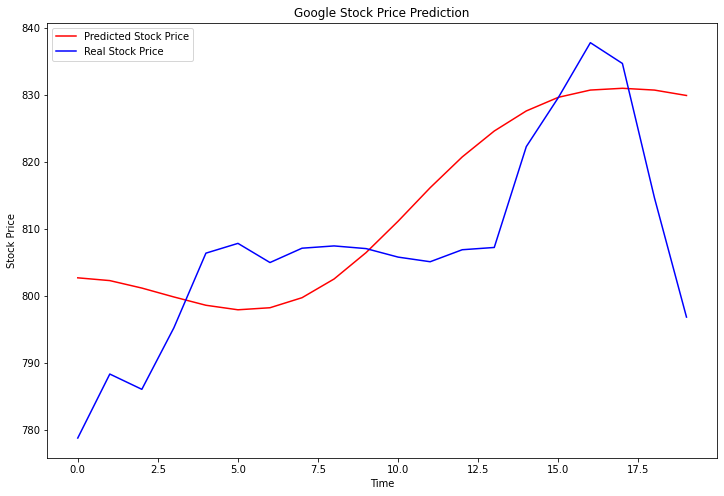

In [27]:
import matplotlib.pyplot as plt
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
